In [1]:
# 기본 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

#------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn      # 머신러닝 학습을 위한 모듈

# Decision Tree    의사결정 나무

<hr/>

### Graphviz            

   + https://graphviz.gitlab.io/_pages/Download/Download_windows.html
   + path  : C:\Program Files (x86)\Graphviz2.38\bin
   + pip install graphviz

In [2]:
# graphviz 사용시 필수적으로 실행
import os
os.environ["PATH"] += os.pathsep +"C:\\Program Files (x86)\\Graphviz2.38\\bin"

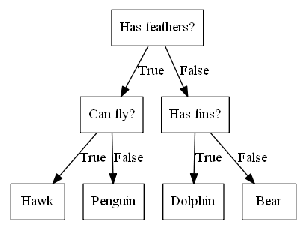

In [3]:
mglearn.plots.plot_animal_tree()

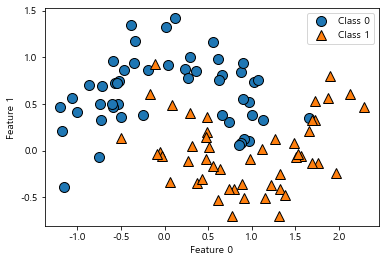

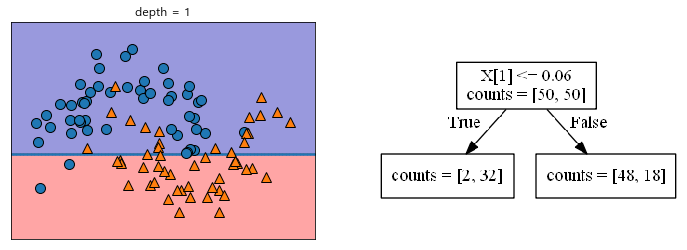

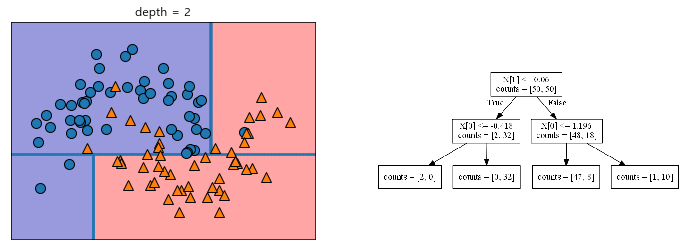

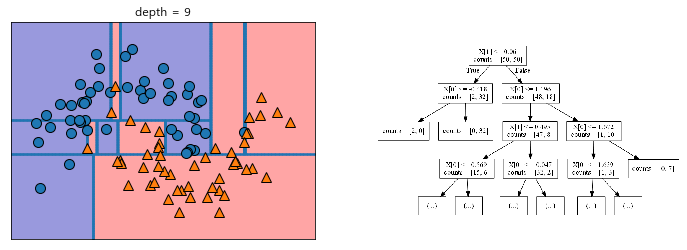

In [4]:
mglearn.plots.plot_tree_progressive()

# 단점 : 새로운 데이터의 입력을 받으면 매우 복잡해진다. > 과대적합

In [5]:
# 데이터 불러오기     대부분 분류 알고리즘을 많이 사용
from sklearn.tree import DecisionTreeClassifier

In [6]:
dt_clf = DecisionTreeClassifier(random_state = 156)

from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

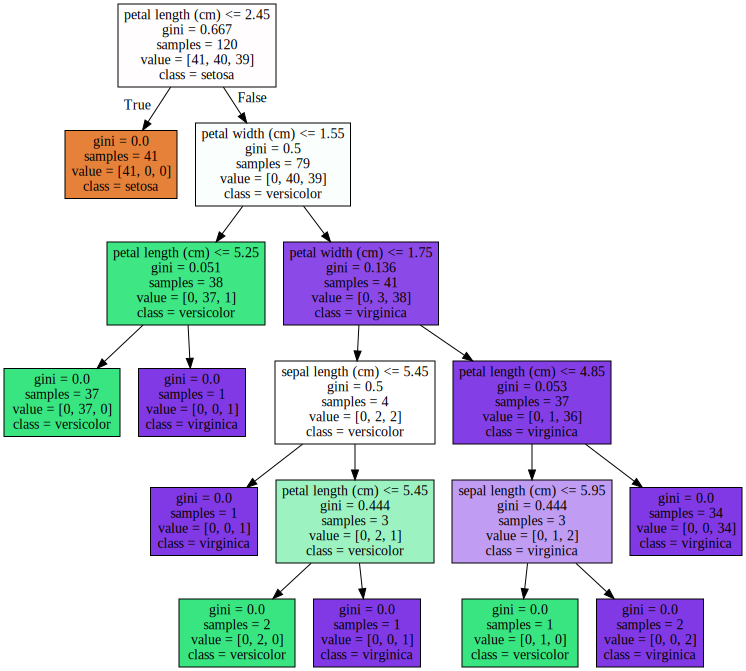

In [7]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf,out_file="data/tree.dot",
                class_names=iris.target_names,
                feature_names=iris.feature_names,
               impurity=True, filled=True)
f = open("data/tree.dot")
dot_gragh = f.read()
display(graphviz.Source(dot_gragh))
f.close()

#  복잡도 제어 : Prunning

     - 사전 가지치기
     - 사후 가지치기
     - sklearn에서는 사후 가지치키만 지원 
     - 매개 변수 (하이퍼 파라미터)
         max_depth
         max_leaf_nodes    : 말단 노드의 최대 개수 
         min_samples_leaf  : 리프노드가 되기 위한 최소한의 샘플 개수 
         min_samples_split : 노드가 분기 할 수 있는 최소 샘플 개수 
         max_features      : 최적의 분할을 위해 고려할 피처 개수 
         
         
의사결정트리는 깊어질수록 과대적합

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0 , max_depth = 4,criterion="entropy").fit(X_train,y_train)
tree

print("train :",tree.score(X_train,y_train))
print("test :",tree.score(X_test,y_test))

train : 0.9859154929577465
test : 0.958041958041958


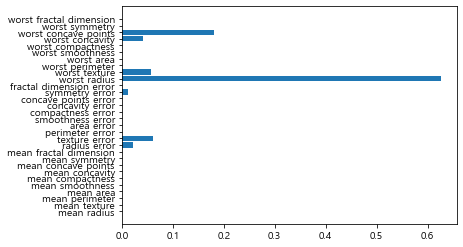

In [9]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
plot_feature_importances_cancer(tree)

In [10]:
print(tree.feature_importances_)

for name, value in zip(cancer.feature_names,tree.feature_importances_):
    print(name,value)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02093242 0.06165377
 0.         0.         0.         0.         0.         0.
 0.01268893 0.         0.62610311 0.05695529 0.         0.
 0.         0.         0.0417274  0.17993908 0.         0.        ]
mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.020932416721834466
texture error 0.06165377247546855
perimeter error 0.0
area error 0.0
smoothness error 0.0
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.012688928106835506
fractal dimension error 0.0
worst radius 0.6261031107460379
worst texture 0.056955290017455966
worst perimeter 0.0
worst area 0.0
worst smoothness 0.0
worst compactness 0.0
worst concavity 0.04172740474258822
worst concave points 0.17993907718977936
worst symmetry 0

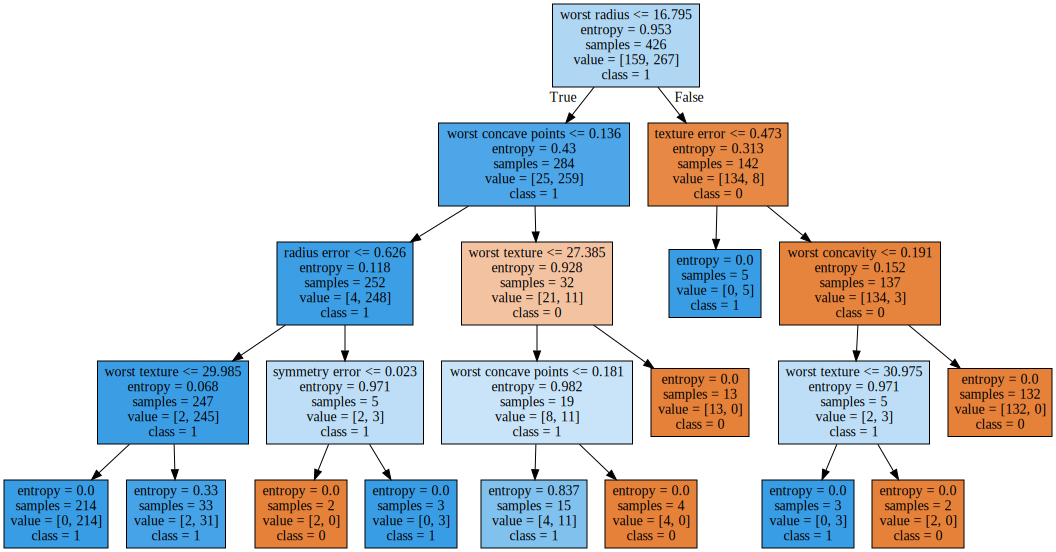

In [11]:
export_graphviz(tree,out_file="data/tree.dot",
                class_names=["0","1"],
                feature_names=cancer.feature_names,
               impurity=True, filled=True)
f = open("data/tree.dot")
dot_gragh = f.read()
display(graphviz.Source(dot_gragh))
f.close()

# 사례1 : iris

In [12]:
dt_clf = DecisionTreeClassifier(random_state = 156)

from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["result"]=iris.target
df.head()
X = iris.data[:,[2,3]]
y= iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 0)
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train,y_train)

print("train :",dt_clf.score(X_train,y_train))
print("test :",dt_clf.score(X_test,y_test))

train : 0.9821428571428571
test : 0.9736842105263158


#  사례2 : 서울지역 동 분류

In [13]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [14]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [15]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]


In [16]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [17]:
train_df.label.value_counts()
test_df.label.value_counts()

Gangnam     5
Gangseo     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

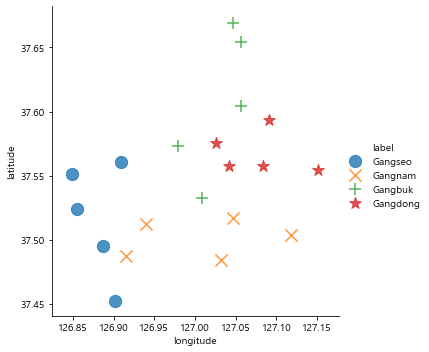

In [18]:
sns.lmplot('longitude', 'latitude', data = train_df, fit_reg = False, hue = 'label',
          markers = ['o', 'x', '+', '*'], scatter_kws = {'s' : 150})

In [19]:
train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"], axis=1, inplace=True)

In [20]:
X_train = train_df[["longitude","latitude"]]
y_train = train_df[["label"]]
X_test = train_df[["longitude","latitude"]]
y_test = train_df[["label"]]

In [21]:
# preprocessing.LabelEncoder >> 문자를 숫자로 바꿔주는 함수
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [22]:
clf = DecisionTreeClassifier(random_state=35,max_depth=3).fit(X_train,y_encode)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=35, splitter='best')

In [23]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print(accuracy_score(y_test.values,le.classes_[pred]))

0.9


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [25]:
X, y = make_moons(n_samples=100,noise=0.25, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,stratify=y)

In [26]:
forest = RandomForestClassifier(random_state=2,n_estimators=5).fit(X_train,y_train)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

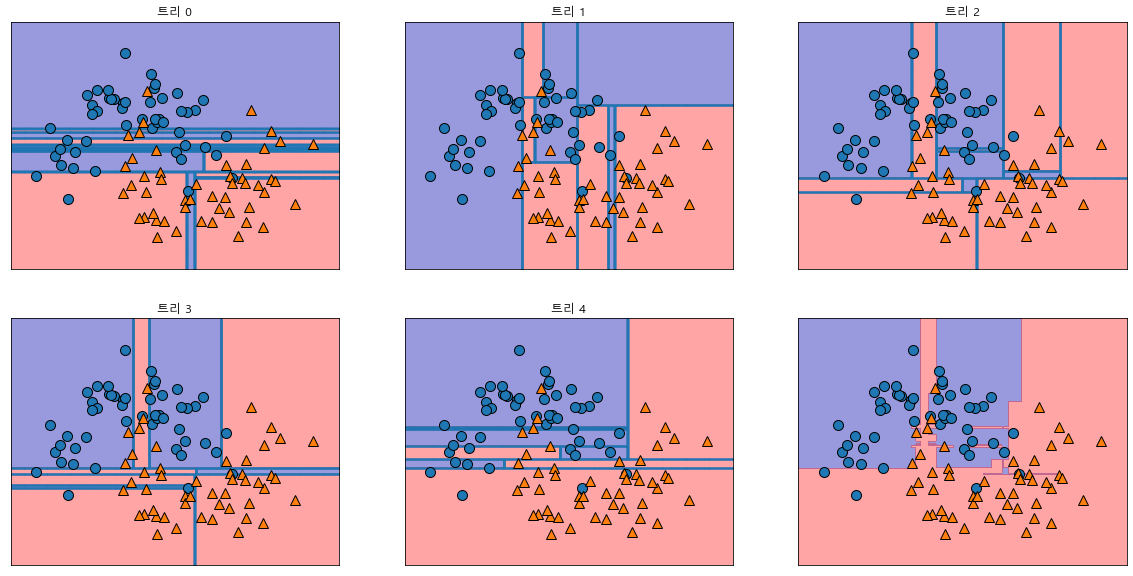

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)
forest = RandomForestClassifier(random_state=0 ,n_estimators=100).fit(X_train,y_train)

print("train :",forest.score(X_train,y_train))
print("test :",forest.score(X_test,y_test))

train : 0.9976525821596244
test : 0.9440559440559441


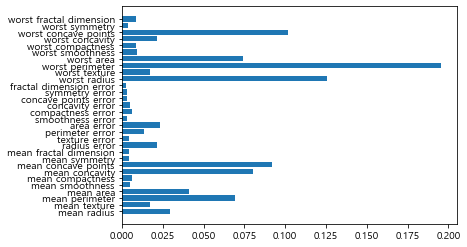

In [29]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
plot_feature_importances_cancer(forest)

<hr/>

# DecisionTree와 RandomForest의 성능차이 

<hr/>

##  사례3 : 손글씨 이미지  <분류 알고리즘에서 절대적>

In [49]:
# 데이터 준비 
from sklearn.datasets import load_digits

mnist = load_digits()
mnist.data.shape         # 원본 샘플은 약 6만개 
mnist.target

# 데이터과 레이블 분류
features, labels = mnist.data,mnist.target

In [50]:
# 교차 검증을 통한 훈련
from sklearn.model_selection import cross_val_score

def cross_validation(clf, features, labels):
    cv_scores = []
    
    for i in range(15):
        scores = cross_val_score(clf,features,labels, scoring="accuracy", cv=10)   # cv = cross validation<교차검증 10번 
        cv_scores.append(scores.mean())
    
    return cv_scores

In [64]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(),features,labels)
rf_cv_scores = cross_validation(RandomForestClassifier(),features,labels)

In [66]:
cv_list = [["random_forest",rf_cv_scores],["decision_tree",dt_cv_scores]]

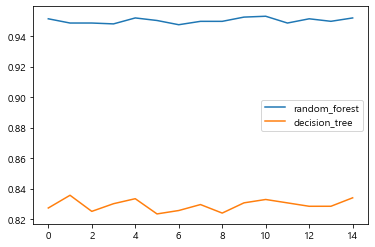

In [69]:
df = pd.DataFrame.from_dict(dict(cv_list))
# df = pd.DataFrame({'random_forest' : rf_cv_scores, 'decision_tree' : dt_cv_scores})
df.plot()

In [71]:
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))

0.8294318228843367
0.9503900268984068


<hr/>

# 사례4 : 독버섯 데이터

   + https://archive.ics.uci.edu/ml/index.php   <<< 머신러닝 데이터 셋 제공 
   + https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data   <<< 독버섯 데이터셋 다운
   + 다운받은 파일은 mushrooms.csv로 변경한다.

In [106]:
# 데이터 불러오기 
mr = pd.read_csv("data/mushrooms.csv", header=None)
mr.head()
mr.shape

(8124, 23)

In [108]:
# null값 찾기 
mr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [109]:
# describe() 함수를 이용하여 요약 통게량을 출력합니다.
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [110]:
# 데이터,레이블 분리
X = mr.drop(0,axis=1)
y= mr[0]

In [111]:
# 문자 > 숫자
from sklearn.preprocessing import LabelEncoder

le_x = LabelEncoder()
for col in X.columns:
    X[col] = le_x.fit_transform(X[col])
    
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [112]:
# 훈련용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [113]:
# KNN 알고리즘 ㄱㄱ
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier().fit(X_train,y_train)
pred = clf.predict(X_test)
print("KNN 정답률 : ",accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

KNN 정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1088
           1       1.00      1.00      1.00       943

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [114]:
# LogisticRegression 선형회귀 ㄱㄱ
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression().fit(X_train, y_train)  # Logistic 하이퍼 파라미터 : C 
pred2 = clf2.predict(X_test)

print("LogisticRegression 정답률 : ",accuracy_score(y_test,pred2))
print(classification_report(y_test,pred2))

LogisticRegression 정답률 :  0.9566715903495815
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1088
           1       0.95      0.95      0.95       943

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [115]:
# DecisionTree ㄱㄱ
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier().fit(X_train, y_train)  
pred3 = clf3.predict(X_test)

print("Decisiontree 정답률 : ",accuracy_score(y_test,pred3))
print(classification_report(y_test,pred3))

Decisiontree 정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1088
           1       1.00      1.00      1.00       943

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [116]:
# RandomForest ㄱㄱ
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier().fit(X_train, y_train)  
pred4 = clf4.predict(X_test)

print("RandomForest 정답률 : ",accuracy_score(y_test,pred4))
print(classification_report(y_test,pred4))

RandomForest 정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1088
           1       1.00      1.00      1.00       943

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [132]:
# 표준화 StandardScaler


X = pd.get_dummies(X, columns = X.columns, drop_first = True)

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
# 표준화 후 로지스틱 (전처리가 중요하다)
from sklearn.linear_model import LogisticRegression

clf5 = LogisticRegression().fit(X_train, y_train)
pred5 = clf5.predict(X_test)

print("정답률 : ",accuracy_score(y_test,pred5))
print(classification_report(y_test,pred5))

정답률 :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1069
           1       1.00      1.00      1.00       962

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# Gradient Boosting Regression Tree

   + 회귀와 분류에서 모두 사용
   + 이전 트리의 오차를 보완하는 방식으로 트리 생성(경사 하강법)
   + 강력한 사전 가지치기 사용
   + 랜덤포레스트보다는 매개변수 설정에 민감하지만 잘 조정하면 더 높은 정확도 제공
   + 하이퍼 파라미터 : learning_rate(를 사용하여 오차 보정)
   + XG Boost,LightGBM 알고리즘
   
   + 실제로 사용시 Random Forest와 차이가 없다 / Random Forest의 성능이 최대한으로 나왔을 때 사용 

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [136]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=42)

In [138]:
# 길이는 3 트리의 개수는 100개, learning_rate=0.1  < default
tree = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)
print("훈련 정확도 : ",tree.score(X_train,y_train))
print("테스트 정확도 : ",tree.score(X_test,y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.958041958041958


In [139]:
tree = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train,y_train)
print("훈련 정확도 : ",tree.score(X_train,y_train))
print("테스트 정확도 : ",tree.score(X_test,y_test))

훈련 정확도 :  0.9906103286384976
테스트 정확도 :  0.965034965034965


In [146]:
tree = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train,y_train)
print("훈련 정확도 : ",tree.score(X_train,y_train))
print("테스트 정확도 : ",tree.score(X_test,y_test))

훈련 정확도 :  0.9929577464788732
테스트 정확도 :  0.958041958041958
